In [1]:
import numpy as np
from astropy.io import fits
from marvin.tools import Maps
import marvin.utils.plot.colorbar as colorbar
from tqdm import tqdm
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import scipy as scipy
from scipy.fft import fft
from scipy import ndimage

import multiprocessing as mp
from multiprocessing import Pool
import copy

import Simpler_Classifier

from importlib import reload 


[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)


In [31]:
my_module = reload(Simpler_Classifier) # reload of Simpler_Classifier without restart

In [2]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_training_set.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']


In [2]:
# good data:
data_good = ['8083-3704','8311-12704','8602-6101','9892-3703','12089-3703','12491-3704']

# bad data
data_bad = ['7981-12702', '8135-12701', '8244-3704', '8312-9101', '8462-12705', '8596-9102']

data = '7981-12702'

In [29]:
for i in data_bad:
    print(Simpler_Classifier.quality_test(i))

('7981-12702', 0.7898739243546128)
('8135-12701', 0.8369189907038512)
('8244-3704', 0.8201943844492441)
('8312-9101', 0.8798488664987405)
('8462-12705', 0.8706283764572078)
('8596-9102', 0.8762188515709642)


In [30]:
for i in data_good:
    print(Simpler_Classifier.quality_test(i))

('8083-3704', 0.6081409477521263)
('8311-12704', 0.6800556770729768)
('8602-6101', 0.573389651531151)
('9892-3703', 0.7450564971751412)
('12089-3703', 0.7390737116764514)
('12491-3704', 0.651431718061674)


In [4]:
# detect from r = 0.3
# 

# measure the difference between before-gaussian and after-gaussian
# count number of "zero bin".
# measuring bin quality
# 

In [10]:
def shelled(data):
    try:
        result = Simpler_Classifier.quality_test(data)
        return result
    except:
        pass

In [11]:
if __name__ == '__main__':
    pool = mp.Pool(processes=6)

    results = []
    for result in pool.imap_unordered(shelled, plateifu):
        results.append(result)
    
pool.close()
pool.join() 
    #print(results)

[WARNING]: Cannot retrieve URLMap. Remote functionality will not work: Requests Timeout Error: HTTPSConnectionPool(host='dr17.sdss.org', port=443): Read timed out. (read timeout=3.05) (MarvinUserWarning)
[WARNING]: Cannot retrieve URLMap. Remote functionality will not work: Requests Timeout Error: HTTPSConnectionPool(host='dr17.sdss.org', port=443): Read timed out. (read timeout=3.05) (MarvinUserWarning)
[WARNING]: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray. (VisibleDeprecationWarning)
[WARNING]: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray. (VisibleDeprecationWarning)
[WARNING]: Creating an ndarray from 

In [14]:
count = 0
for i in results:
    if i == 1:
        count = count+1
    else:
        pass

In [15]:
count

6

In [31]:
len(np.where(np.array(curve) == 0)[0])

16

In [22]:
ew_cycle = list(curve)*cycle

# Gaussian smooth
ew_smo = scipy.ndimage.gaussian_filter(ew_cycle, sigma = 0)

# Intepolate to N * 360 degree
x = np.linspace(0,len(ew_smo),len(ew_smo))
y = ew_smo
x2 = np.linspace(0,len(ew_smo),360*cycle)
f_linear = scipy.interpolate.interp1d(x, y, kind='linear')
intp_EW = f_linear(x2)

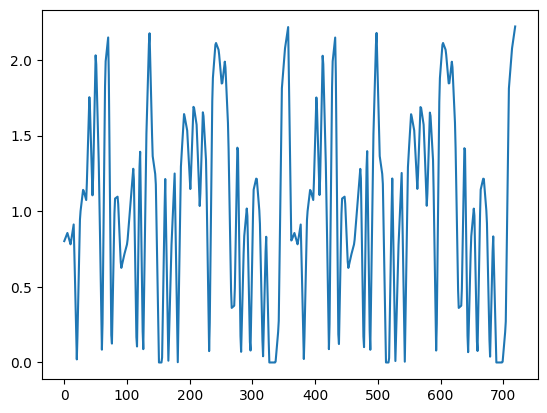

In [23]:
plt.plot(intp_EW)
plt.show()

[WARNING]: subprocess 17226 is still running (ResourceWarning)


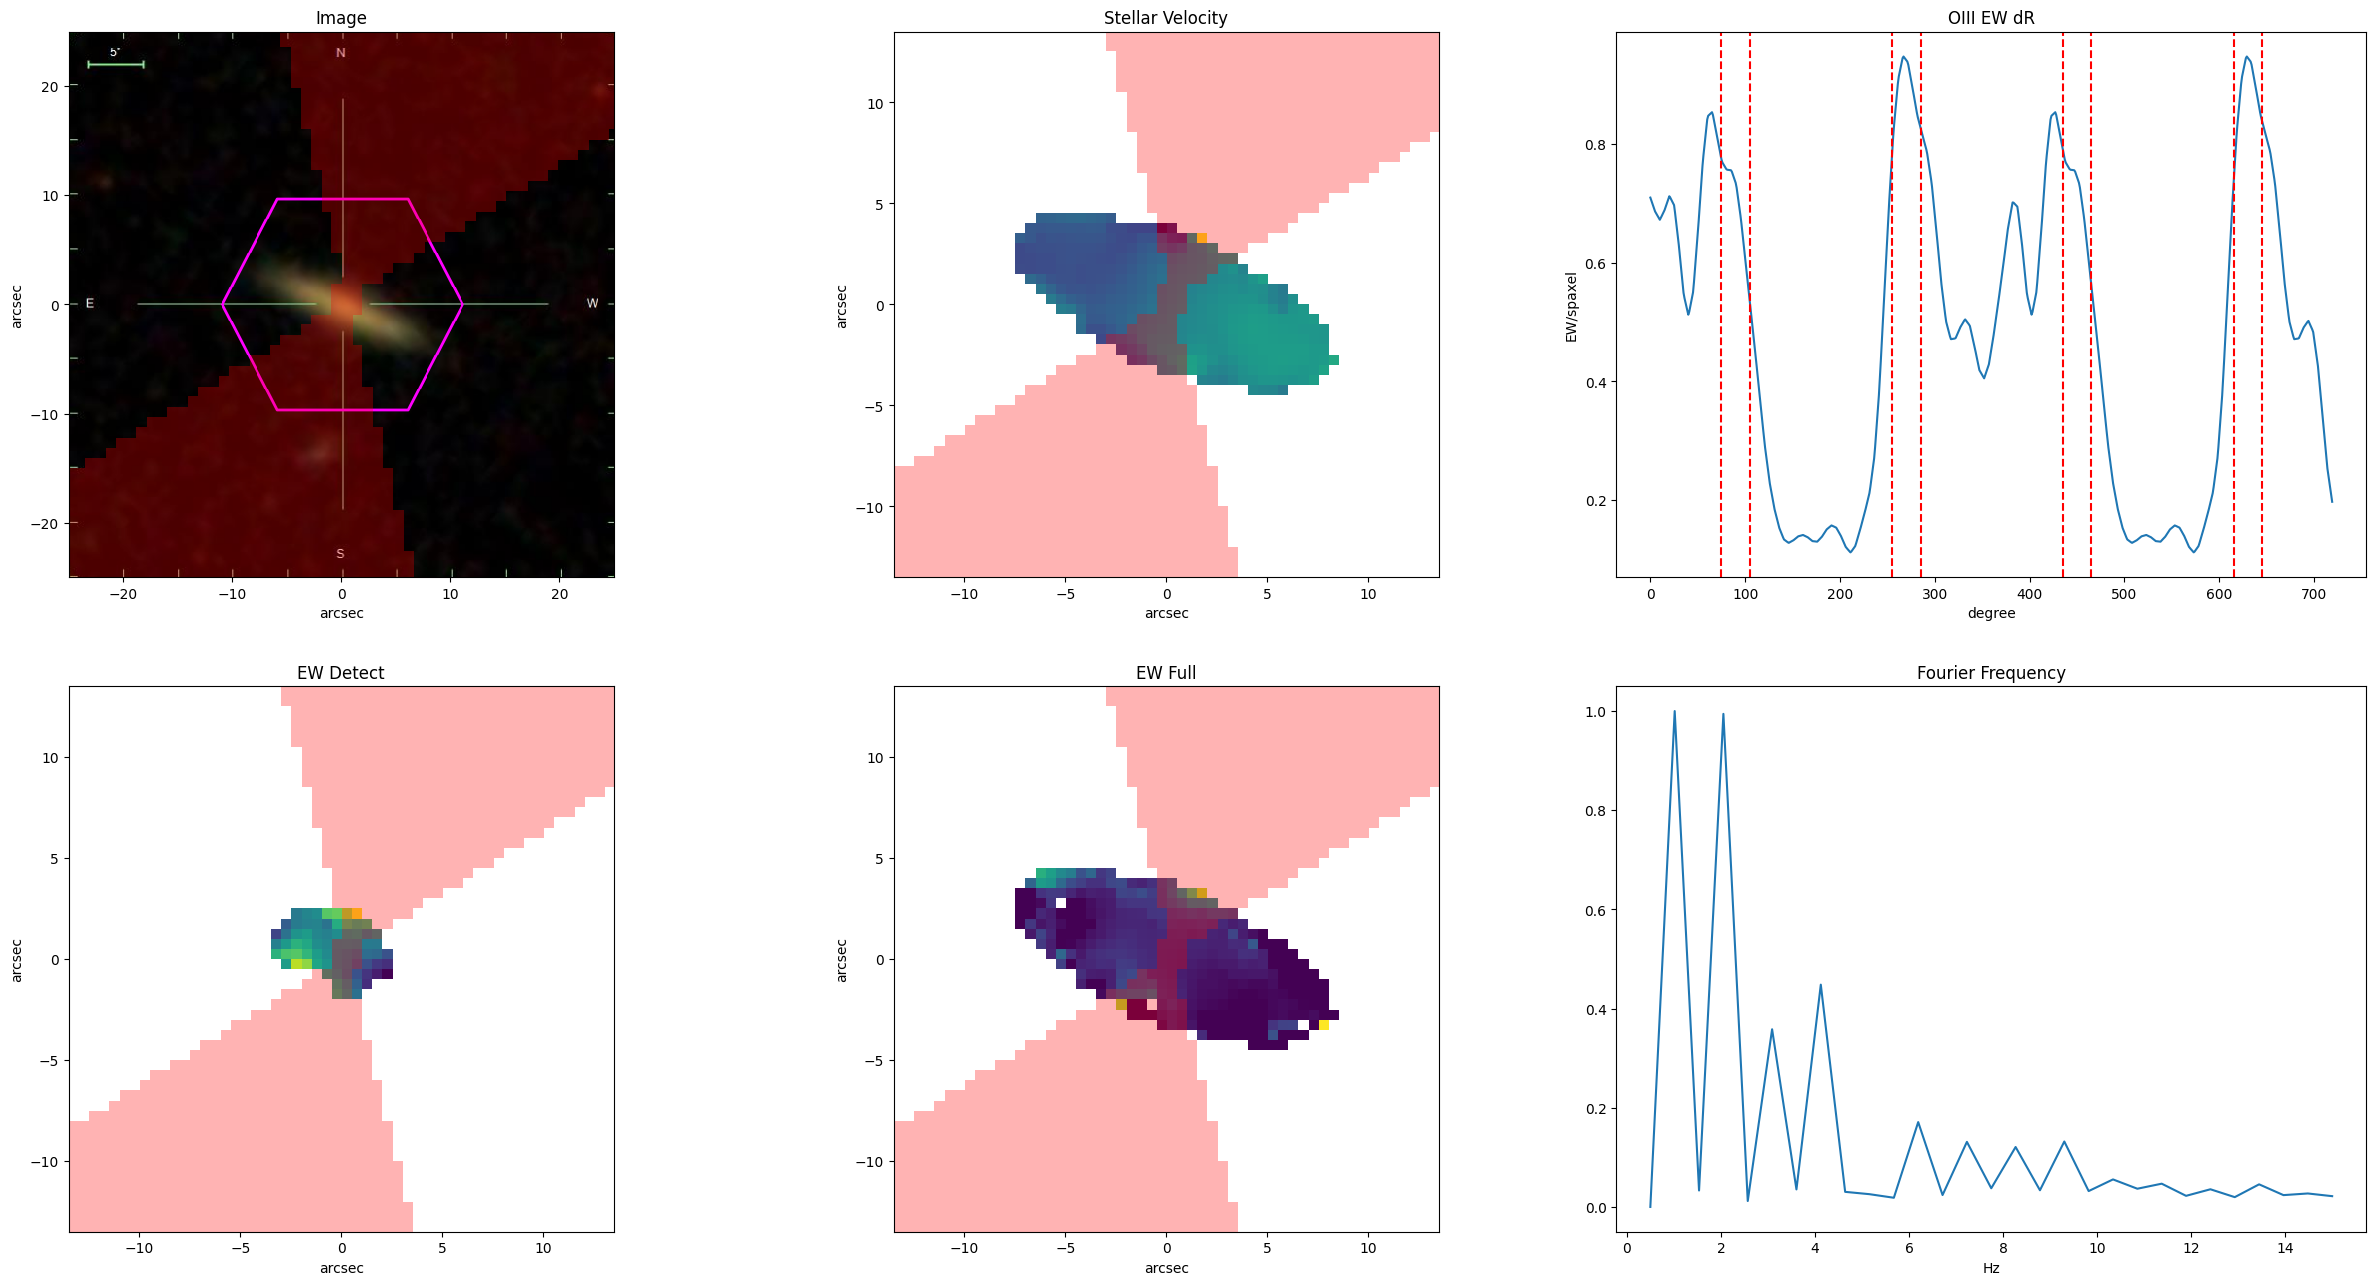

In [35]:
Simpler_Classifier.plot_compared('8602-6101', save = False)